In [180]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import math
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer 

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

import nltk
import string
import seaborn as sns
color = sns.color_palette()
from wordcloud import WordCloud ,STOPWORDS
import re
import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


#

In [153]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [48]:
# Load data
data = pd.read_csv('inputs/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [49]:
# Comment lengths
data['length'] = data['comment_text'].map(lambda x: len(x))

plt.hist(data['length'])

(array([ 75720.,  12184.,   3919.,   1571.,    714.,    460.,    343.,
           281.,    250.,    409.]),
 array([    6. ,   505.4,  1004.8,  1504.2,  2003.6,  2503. ,  3002.4,
         3501.8,  4001.2,  4500.6,  5000. ]),
 <a list of 10 Patch objects>)

In [50]:
# Empty comments?
data['comment_text'] = data['comment_text'].map(lambda x: x.strip(''))
missing = data.loc[data['comment_text'] ==""]
print(missing) # None

null_check=data.isnull().sum()
print(null_check)

Empty DataFrame
Columns: [id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate, length]
Index: []
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
length           0
dtype: int64


In [52]:
# Tokenize, remove stop words, convert to frequency matrix
stop_words = stopwords.words('english')
tokenized = data['comment_text'].head().apply(word_tokenize)
word_list = tokenized[1]
filtered = [word for word in word_list if word not in stop_words and word.isalpha()]
filtered
# Apply to all rows

['Please', 'vandalize', 'pages', 'edit', 'Merwin', 'If', 'continue', 'blocked']

In [87]:
rowsums=data.iloc[:,2:8].sum(axis=1)
data['clean']=(rowsums==0)

subset=data[data.clean==False]

subset.iloc[:,2:].head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,exc_density,clean
0,1,0,0,0,0,0,83,0.000000,False
20,1,0,0,0,0,0,127,0.000000,False
26,1,0,0,0,0,0,79,0.012658,False
30,1,0,0,0,0,0,552,0.000000,False
32,1,0,1,0,1,0,129,0.000000,False


In [70]:
# Look at multi tag correlation matrix and other data, prevalence of multi tags

#marking comments without any tags as "clean"

print("Total comments = ",len(data))
print("Total clean comments = ",data['clean'].sum())
print("Total tags =",data.iloc[:,2:7].sum())

Total comments =  95851
Total clean comments =  86099
Total tags = toxic           9237
severe_toxic     965
obscene         5109
threat           305
insult          4765
dtype: int64


In [106]:
# HeatMap Saved to Plots Folder

corr=subset.iloc[:,2:8].corr()



plt.figure(figsize=(10,8))
fig = plt.figure()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
fig.savefig('Plots/heatmap_categories.png')
plt.show()
plt.close(fig) 

corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.080910,-0.020737,0.003128,-0.045008,-0.027275
severe_toxic,0.080910,1.000000,0.286341,0.088632,0.249083,0.121335
obscene,-0.020737,0.286341,1.000000,0.045706,0.512352,0.138648
threat,0.003128,0.088632,0.045706,1.000000,0.060638,0.082282
insult,-0.045008,0.249083,0.512352,0.060638,1.000000,0.206365
identity_hate,-0.027275,0.121335,0.138648,0.082282,0.206365,1.000000


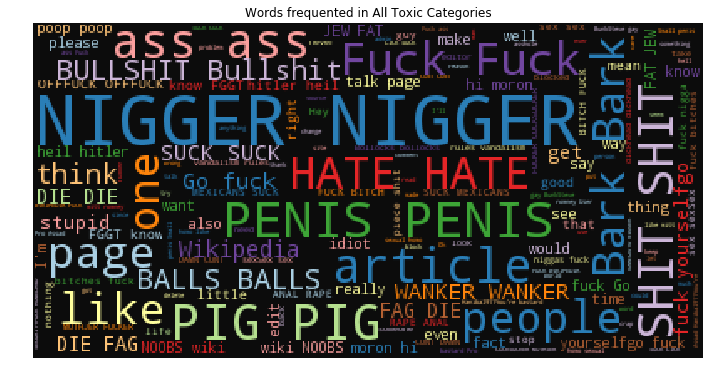

In [174]:
# Word Clouds by Categories: All Toxic Cat


subset=data[data.clean==False]
text=subset.comment_text.values


wc= WordCloud(background_color="black",max_words=2000,stopwords=stop_words,collocate=False)
wc.generate(text.sum())
fig = plt.figure(figsize=(20, 10))
plt.axis("off")
plt.title("Words frequented in All Toxic Categories", fontsize=12)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=20), alpha=0.95)
fig.savefig('Plots/toxic_wordcloud.png')
plt.show()
plt.close()

In [177]:
subset=data[data.clean==True]
text=subset.comment_text.values

wc= WordCloud(background_color="black",max_words=2000,stopwords=stop_words)
wc.generate(" ".join(text))
plt.figure(figsize=(20, 10))
fig = plt.figure(figsize=(20, 10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'plasma' , random_state=20), alpha=0.95)
fig.savefig('Plots/Clean_wordcloud.png')
plt.close()